### Part 2

In [3]:
import scipy.signal as sig
import skimage as sk
import skimage.io as skio
import cv2
import matplotlib.pyplot as plt
import numpy as np

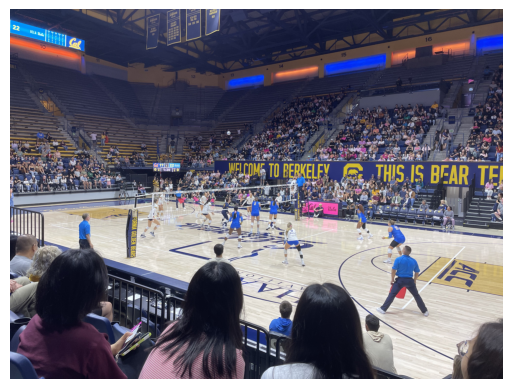

In [143]:
#Load image
imname = './images/calVucla.jpg'
im = cv2.imread(imname)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = im.astype(np.float64)/255
plt.axis('off')
plt.imshow(im)
# plt.savefig(f'./webImages/part2/unsharpenedCalVucla.png', bbox_inches='tight', pad_inches=0)

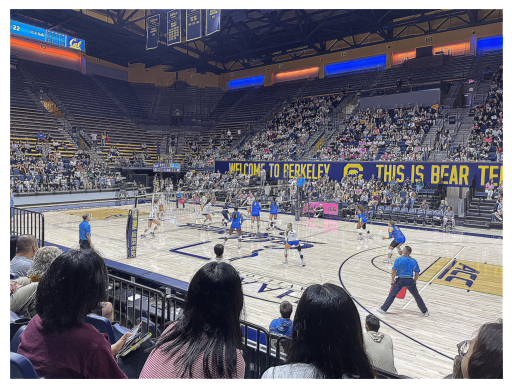

In [144]:
#Creating the unsharp mask filter
def filter(kernel, sigma, alpha):
    filter = ((1 + alpha)*sig.unit_impulse((kernel,kernel), idx='mid').astype(np.float64) - alpha * (cv2.getGaussianKernel(kernel, sigma) * cv2.getGaussianKernel(kernel, sigma).T).astype(np.float64))
    # filter = sig.unit_impulse((kernel,kernel))
    return filter

sharpenedR = sig.convolve2d(im[:,:,0], filter(10, 2, 10), mode="same")
sharpenedG = sig.convolve2d(im[:,:,1], filter(10, 2, 10), mode="same")
sharpenedB = sig.convolve2d(im[:,:,2], filter(10, 2, 10), mode="same")

sharpenedColor = np.stack((sharpenedR,sharpenedG,sharpenedB), axis=2)
sharpenedColor = np.clip(sharpenedColor, 0, 1)
plt.axis('off')
plt.imshow(sharpenedColor)
# plt.savefig(f'./webImages/part2/sharpenedCalVucla.png', bbox_inches='tight', pad_inches=0)

### Evaluation

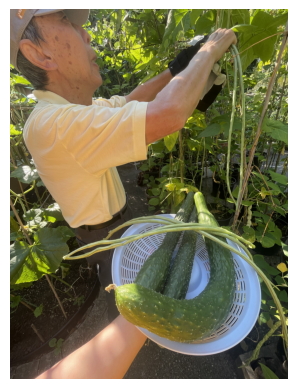

In [146]:
imname = './images/garden.jpg'
im = cv2.imread(imname)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = im.astype(np.float64)/255
plt.axis('off')
plt.imshow(im)

True

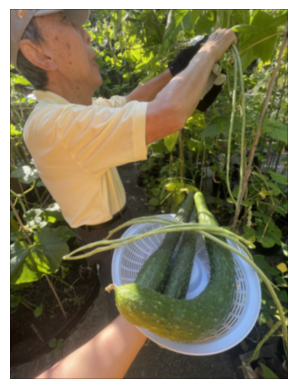

In [156]:
#Blurring img
gaussianFilter = cv2.getGaussianKernel(20, sigma=20)
gaussianFilter = gaussianFilter * gaussianFilter.T
imBlurred = np.array([sig.convolve2d(im[:,:,i], gaussianFilter, mode="same") for i in range(0,3)])
imBlurred = np.stack((imBlurred[0],imBlurred[1],imBlurred[2]), axis=2)
plt.axis('off')
plt.imshow(imBlurred)
# cv2.imwrite(f'./webImages/part2/blurredGarden.png', cv2.cvtColor((imBlurred*255).astype(np.uint8), cv2.COLOR_RGB2BGR))

True

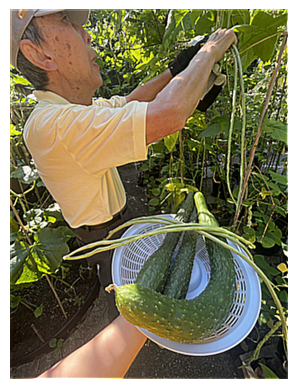

In [169]:
#Sharpen image again
sharpenedR = sig.convolve2d(imBlurred[:,:,0], filter(20, 20, 8), mode="same")
sharpenedG = sig.convolve2d(imBlurred[:,:,1], filter(20, 20, 8), mode="same")
sharpenedB = sig.convolve2d(imBlurred[:,:,2], filter(20, 20, 8), mode="same")

sharpenedColor = np.stack((sharpenedR,sharpenedG,sharpenedB), axis=2)
sharpenedColor = np.clip(sharpenedColor, 0, 1)
plt.axis('off')
plt.imshow(sharpenedColor)
cv2.imwrite(f'./webImages/part2/resharpenedGarden.png', cv2.cvtColor((sharpenedColor*255).astype(np.uint8), cv2.COLOR_RGB2BGR))